In [1]:
%%capture
%%bash
pip -q install timm
#rm -rf otcv23
#git clone https://github.com/tendermonster/otcv23.git

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
#os.chdir("./otcv23")
# download model
! wget -P model_zoo/ https://dlcv2023.s3.eu-north-1.amazonaws.com/Swin2SR_CompressedSR_X4_48.pth

--2023-04-13 11:25:02--  https://dlcv2023.s3.eu-north-1.amazonaws.com/Swin2SR_CompressedSR_X4_48.pth
Resolving dlcv2023.s3.eu-north-1.amazonaws.com (dlcv2023.s3.eu-north-1.amazonaws.com)... 52.95.169.36
Connecting to dlcv2023.s3.eu-north-1.amazonaws.com (dlcv2023.s3.eu-north-1.amazonaws.com)|52.95.169.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61121509 (58M) [application/x-www-form-urlencoded]
Saving to: ‘model_zoo/Swin2SR_CompressedSR_X4_48.pth’

Swin2SR_CompressedS 100%[===================>]  58,29M  13,1MB/s    in 4,6s    

2023-04-13 11:25:07 (12,7 MB/s) - ‘model_zoo/Swin2SR_CompressedSR_X4_48.pth’ saved [61121509/61121509]



In [33]:
def load_img (filename, debug=False, norm=True, resize=None):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if norm:   
        img = img / 255.
        img = img.astype(np.float32)
    if debug:
        print (img.shape, img.dtype, img.min(), img.max())
    if resize:
        img = cv2.resize(img, (resize[0], resize[1]))
    return img

def plot_all (images, axis='off', figsize=(16, 8)):
    fig = plt.figure(figsize=figsize, dpi=80)
    nplots = len(images)
    for i in range(nplots):
        plt.subplot(1,nplots,i+1)
        plt.axis(axis)
        plt.imshow(images[i])
    plt.show()

def video_to_frames():
  # ! wget -P media/ https://dlcv2023.s3.eu-north-1.amazonaws.com/demo.mp4
  ! wget -P media/ https://dlcv2023.s3.eu-north-1.amazonaws.com/demo_small.mp4
  ! mkdir media/video/
  # vidcap = cv2.VideoCapture('media/demo.mp4')
  vidcap = cv2.VideoCapture('media/demo_small.mp4')
  success,image = vidcap.read()
  count = 0
  while success:
    cv2.imwrite("media/video/frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    # print('Read a new frame: ', success)
    count += 1

def save():
    ! ffmpeg -r 24 -i results/swin2sr_compressed_sr_x4/frame%01d.png -vcodec mpeg4 -crf 0 -y demo_sr.mp4

def save_lossless():
    ! ffmpeg -r 24 -i results/swin2sr_compressed_sr_x4/frame%01d.png -c:v libx264rgb -crf 25 -y demo_sr.mp4


In [4]:
video_to_frames()

--2023-04-13 11:25:16--  https://dlcv2023.s3.eu-north-1.amazonaws.com/demo_small.mp4
Resolving dlcv2023.s3.eu-north-1.amazonaws.com (dlcv2023.s3.eu-north-1.amazonaws.com)... 16.12.11.46
Connecting to dlcv2023.s3.eu-north-1.amazonaws.com (dlcv2023.s3.eu-north-1.amazonaws.com)|16.12.11.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4888601 (4,7M) [video/mp4]
Saving to: ‘media/demo_small.mp4’

demo_small.mp4      100%[===================>]   4,66M  9,10MB/s    in 0,5s    

2023-04-13 11:25:17 (9,10 MB/s) - ‘media/demo_small.mp4’ saved [4888601/4888601]



## Test Compressed Image Super-Resolution (SR) X4

1. create a folder `inputs` and put there the input images. The model expects low-quality and low-resolution JPEG compressed images.

2. select `--scale` standard is 4, this means we will increase the resolution of the image x4 times. For example for a 1MP image (1000x1000) we will upscale it to near 4K (4000x4000).

3. run our model using `main_test_swin2sr.py` and `--save_img_only`. The pre-trained models are included in [our repo](https://github.com/mv-lab/swin2sr), you can download them from [here](https://github.com/mv-lab/swin2sr/releases) or check the repo [releases](https://github.com/mv-lab/swin2sr/releases). It is important to select the proper `--task`, by default we do compressed input super-resolution `compressed_s`.

4. we process the images in `inputs/` and the outputs are stored in `results/swin2sr_{TASK}_x{SCALE}` where TASK and SCALE are the selected options. You can just navigate through `results/`

You can find more details about the code in our repo **https://github.com/mv-lab/swin2sr**

In [2]:
# Clean and create the inputs/ directory from scratch

#!rm -r inputs
#!mkdir inputs

# Put some images into inputs/
#!cp testsets/real-inputs/* inputs/ 

# check the images in input/
#!ls inputs

In [6]:
%%bash
rm -rf results/*

In [7]:
! python main_test_swin2sr.py --task compressed_sr --scale 4 --training_patch_size 48 --model_path model_zoo/Swin2SR_CompressedSR_X4_48.pth --folder_lq ./media/video/ --save_img_only

loading model from model_zoo/Swin2SR_CompressedSR_X4_48.pth
/home/tinker/miniconda3/envs/cv/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Testing 0 frame0              
Testing 1 frame1              
Testing 2 frame10             
Testing 3 frame100            
Testing 4 frame101            
Testing 5 frame102            
Testing 6 frame103            
Testing 7 frame104            
Testing 8 frame105            
Testing 9 frame106            
Testing 10 frame107            
Testing 11 frame108            
Testing 12 frame109            
Testing 13 frame11             
Testing 14 frame110            
Testing 15 frame111            
Testing 16 frame112            
Testing 17 frame113            
Testing 18 frame114            
Testing 1

In [34]:
# save()
save_lossless()

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [36]:
! ffmpeg -i demo_sr.mp4 -i media/demo_small.mp4 -c copy -map 0:v:0 -map 1:a:0 -shortest -y demo_sr_with_audio.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Processing ./media/video/frame0.jpg. Upscaling resolution from (360, 640, 3) to (1440, 2560, 3)


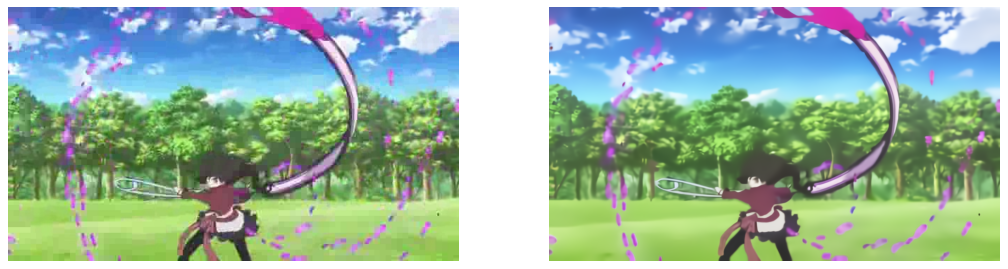

Processing ./media/video/frame1.jpg. Upscaling resolution from (360, 640, 3) to (1440, 2560, 3)


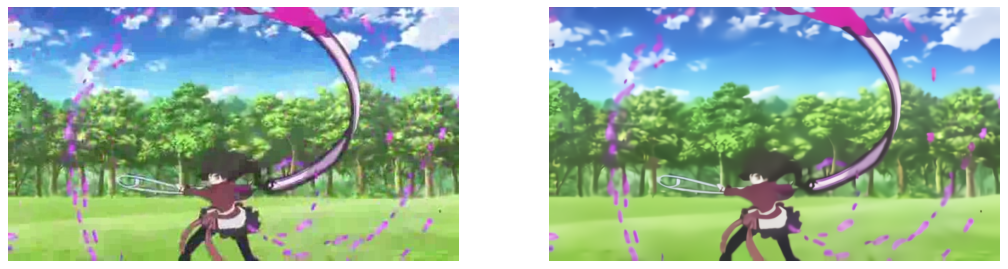

Processing ./media/video/frame10.jpg. Upscaling resolution from (360, 640, 3) to (1440, 2560, 3)


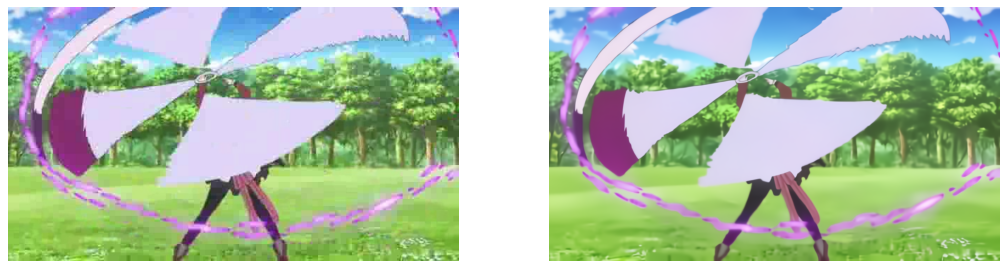

Processing ./media/video/frame100.jpg. Upscaling resolution from (360, 640, 3) to (1440, 2560, 3)


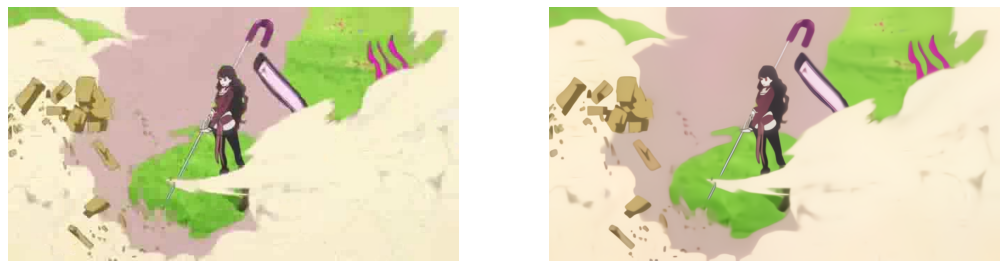

Processing ./media/video/frame101.jpg. Upscaling resolution from (360, 640, 3) to (1440, 2560, 3)


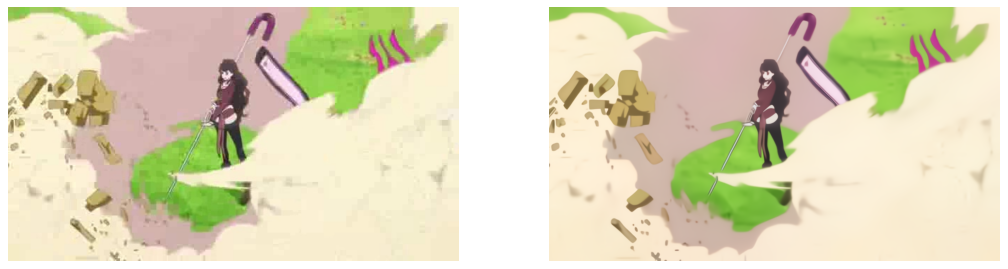

Processing ./media/video/frame102.jpg. Upscaling resolution from (360, 640, 3) to (1440, 2560, 3)


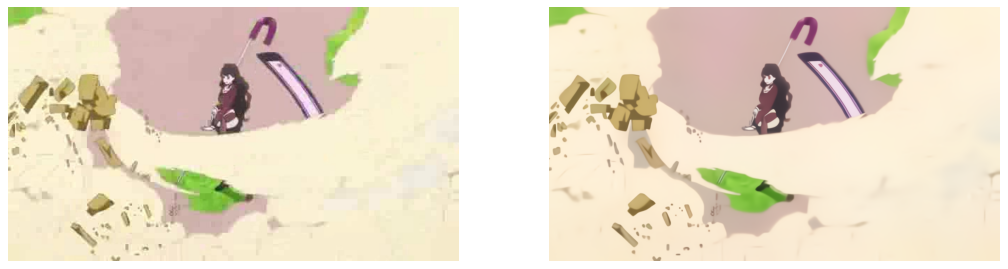

Processing ./media/video/frame103.jpg. Upscaling resolution from (360, 640, 3) to (1440, 2560, 3)


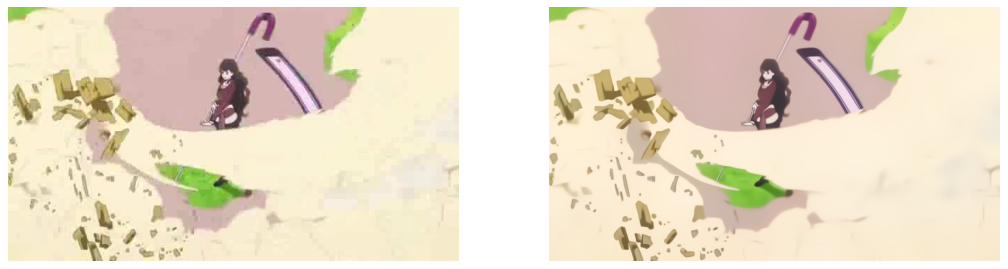

Processing ./media/video/frame104.jpg. Upscaling resolution from (360, 640, 3) to (1440, 2560, 3)


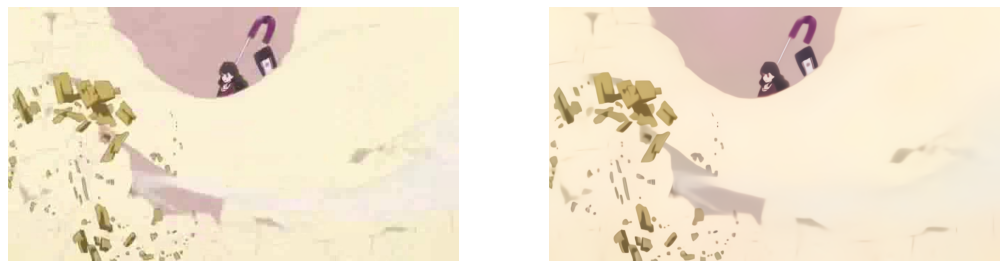

Processing ./media/video/frame105.jpg. Upscaling resolution from (360, 640, 3) to (1440, 2560, 3)


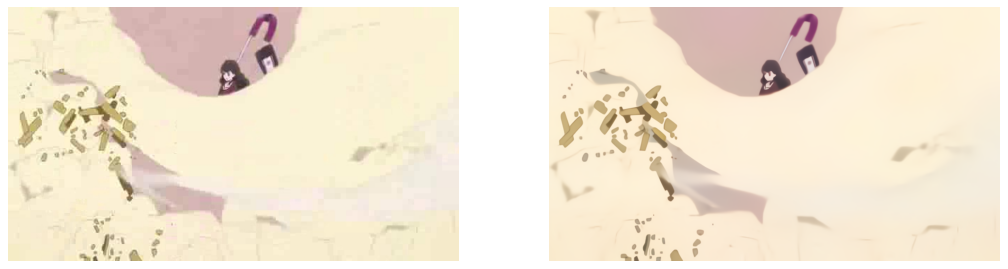

Processing ./media/video/frame106.jpg. Upscaling resolution from (360, 640, 3) to (1440, 2560, 3)


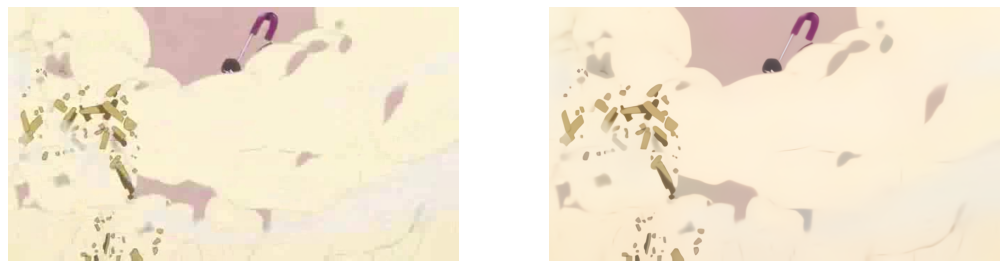

In [10]:
inputs  = sorted(glob('./media/video/*'))
outputs = sorted(glob('./results/swin2sr_compressed_sr_x4/*')) # the path to the folder above
show = 10
for input_img_path, output_img_path in zip(inputs, outputs):

    img_input  = load_img(input_img_path)
    img_output = load_img(output_img_path)
    
    print (f'Processing {input_img_path}. Upscaling resolution from {img_input.shape} to {img_output.shape}')
    plot_all([img_input, img_output])
    show -= 1
    if show == 0:
        break